In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats

df = pd.read_csv('dataset/output_with_latlon.csv')

print("Initial Dataset:")
print(df.head())

print("\nMissing Values Summary:")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())  

df = df.dropna(thresh=len(df.columns) * 0.8 , axis=0)
df = df[(df != 0).all(axis=1)]

z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).any(axis=1)
print("\nOutliers detected using Z-scores:")
print(df[outliers])

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers detected using IQR:")
print(df[outliers_iqr])

df = df[~outliers]

print("\nDuplicate Rows:")
print(df[df.duplicated()])
df = df.drop_duplicates()

latitude_col = 'latitude'
longitude_col = 'longitude'

valid_lon_range = (69.0, 80.5)    # longitude range
valid_lat_range = (39.0, 43.5)    # latitude range


df = df[(df[latitude_col].between(*valid_lat_range)) & (df[longitude_col].between(*valid_lon_range))]

print("\nCleaned Dataset:")
print(df.head())

df.to_csv('cleaned_dataset.csv', index=False)

Initial Dataset:
    latitude  longitude  cat  elevation  slope  aspect     flowacc  twi  spi  \
0  41.992489  69.822685    1        0.0    NaN     NaN -247.026921  NaN  NaN   
1  41.997395  69.932357    2        0.0    NaN     NaN -105.729808  NaN  NaN   
2  42.004282  70.090419    3        0.0    NaN     NaN   -6.363335  NaN  NaN   
3  42.005747  70.124709    4        0.0    NaN     NaN   -7.097029  NaN  NaN   
4  42.012146  70.277420    5        0.0    NaN     NaN  -13.344265  NaN  NaN   

   profc  planc  longc  maxic  landform  landcover  minic  ndvi  rainfall  
0    NaN    NaN    NaN    NaN       NaN        NaN    NaN   NaN       NaN  
1    NaN    NaN    NaN    NaN       NaN        NaN    NaN   NaN       NaN  
2    NaN    NaN    NaN    NaN       NaN        NaN    NaN   NaN       NaN  
3    NaN    NaN    NaN    NaN       NaN        NaN    NaN   NaN       NaN  
4    NaN    NaN    NaN    NaN       NaN        NaN    NaN   NaN       NaN  

Missing Values Summary:
latitude          0
l

# **STRATIFIED SAMPLING**

✅ Готово! Кластеры добавлены в 'clustered_dataset.csv'


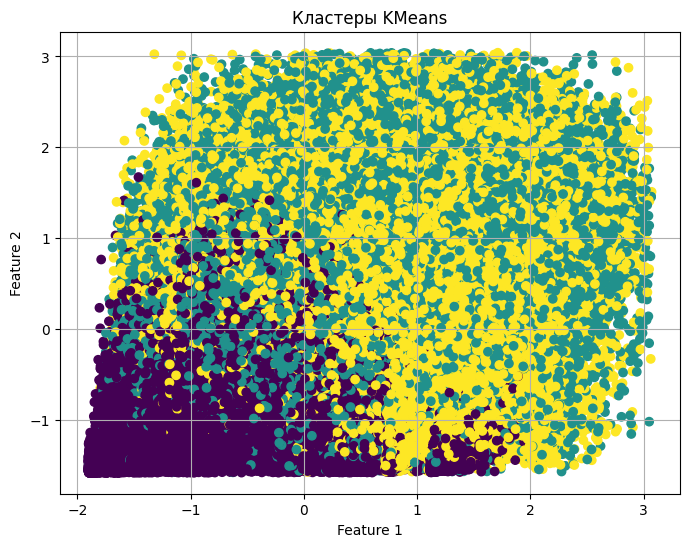

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_dataset.csv")

features = df.drop(columns=['longitude', 'latitude','cat'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df.to_csv("clustered_dataset.csv", index=False)
print("✅ Готово! Кластеры добавлены в 'clustered_dataset.csv'")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Кластеры KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [ ]:
import folium

m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=8)

sampled_df = df.sample(n=10000, random_state=42)

for _, row in sampled_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        fill_color=f"#{(100 + int(row['cluster']) * 50) % 256:02x}0000",
        popup=f"Cluster: {row['cluster']}",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

title = "Clusters Map (First 1000 Points)"
m.get_root().html.add_child(folium.Element(f'<h3 style="text-align:center;">{title}</h3>'))

m.save("clusters_map.html") 
print("🌐 Карта кластеров сохранена как 'clusters_map.html' (только 1000 точек)")


🌐 Карта кластеров сохранена как 'clusters_map.html' (только 1000 точек)


c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:07:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:07:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:07:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python311\Lib\sit

✅ Accuracy (5-fold CV): 0.92


c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\tashmatov\AppData\Local\Temp\ipykernel_12080\3592443820.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')


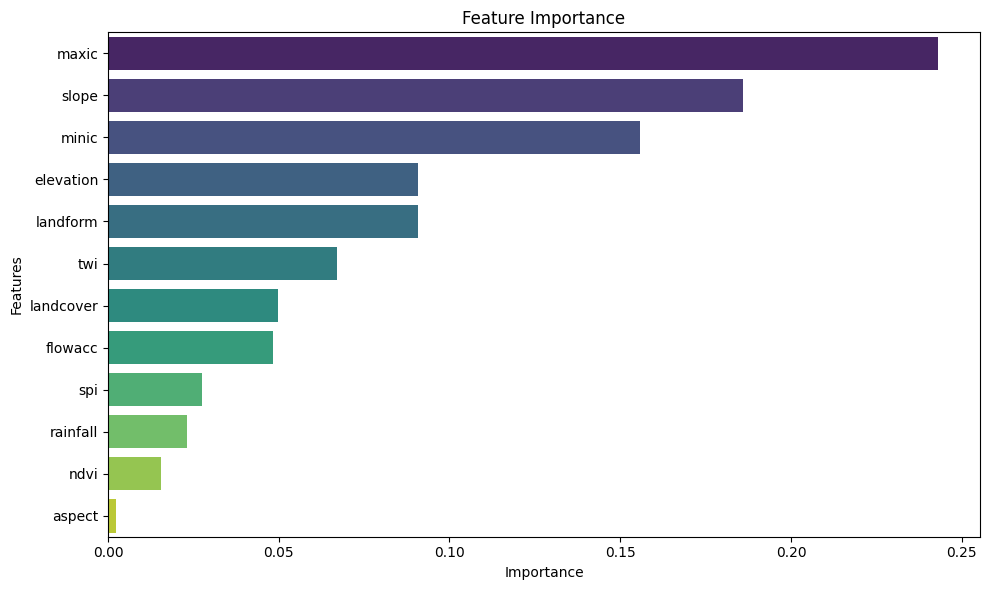

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clustered_dataset.csv")

X = df.drop(columns=['latitude', 'longitude', 'cluster', 'cat'], errors='ignore')
y = df['cluster']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
scores = cross_val_score(model, X_scaled, y, cv=5)

print(f"✅ Accuracy (5-fold CV): {scores.mean():.2f}")

model.fit(X_scaled, y)

feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df = pd.read_csv("cleaned_dataset.csv")

X = df.drop(columns=["longitude", "latitude", "cat"], errors="ignore")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=5, random_state=42)
df["cluster"] = gmm.fit_predict(X_scaled)

cluster_means = df.groupby("cluster").mean(numeric_only=True)

cluster_means["risk_score"] = (
    cluster_means["twi"] +
    cluster_means["elevation"] +
    cluster_means["ndvi"] +
    cluster_means["rainfall"] +
    cluster_means["slope"] +
    cluster_means["flowacc"] + 
    cluster_means["spi"] + 
    cluster_means["landform"] + 
    cluster_means["longc"] +
    cluster_means["profc"] +
    cluster_means["planc"] +
    cluster_means["landcover"]
)

ranked_clusters = cluster_means["risk_score"].rank(method="min").astype(int) - 1
cluster_to_risk_category = ranked_clusters.to_dict()
df["risk_category"] = df["cluster"].map(cluster_to_risk_category)

df.to_csv("labeled_dataset.csv", index=False)
print("✅ Сохранено в 'labeled_dataset.csv' с колонкой 'risk_category'")



✅ Сохранено в 'labeled_dataset.csv' с колонкой 'risk_category'


In [ ]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("labeled_dataset.csv")

X = df.drop(columns=["longitude", "latitude", "cat", "cluster", "risk_category"], errors='ignore')
y = df["risk_category"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(objective='multi:softprob', num_class=5, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)
print(X.describe().T[["min", "max", "mean"]])

y_pred = model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

joblib.dump(model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Модель и scaler сохранены.")



                    min          max         mean
elevation  4.181111e+02  6182.666667  2625.910812
slope      5.852349e-02    60.298130    20.681100
aspect     2.480000e-13   360.000000   181.582052
flowacc   -7.673999e+04  7900.216179    26.679404
twi       -5.051985e-01    10.114350     2.948069
spi       -2.955668e+03  3566.875464     6.509955
profc     -5.926580e-03     0.005783    -0.000087
planc     -7.799008e-03     0.007950     0.000058
longc     -7.497849e-03     0.016827    -0.000078
maxic     -5.478773e-03     0.018323     0.001120
landform   1.000000e+00     6.000000     3.664440
landcover  1.000000e+01   220.000000   109.084372
minic     -7.531135e-03     0.005100    -0.001122
ndvi      -3.862012e-01     0.923783     0.278111
rainfall   2.816168e-02   217.925117    57.500879
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4332
           1       0.97      0.98      0.97     12006
       

In [ ]:
import numpy as np

df['landslide_volume'] = df['slope'] * df['flowacc']

df['valley_width'] = df['longc'].replace(0, 1)

df['MOI'] = np.log10(df['landslide_volume'] / df['valley_width'])

df['secondary_risk'] = (df['MOI'] > 4.6).astype(int)


c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import pandas as pd
import joblib

MODEL_PATH = "xgb_model.pkl"
SCALER_PATH = "scaler.pkl"
INPUT_CSV = "labeled_dataset.csv"
OUTPUT_CSV = "predicted_risk.csv"

def category_label(cat):
    return ["very low", "low", "moderate", "high", "very high"][cat]

model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)

df = pd.read_csv(INPUT_CSV)
coords = df[['latitude', 'longitude']] if {'latitude', 'longitude'}.issubset(df.columns) else None

feature_cols = df.drop(columns=['latitude', 'longitude', 'cluster', 'cat', 'label', 'risk_category'], errors='ignore').columns
X = df[feature_cols]
X_scaled = scaler.transform(X)

df['risk_category'] = model.predict(X_scaled)
df['risk'] = df['risk_category'].apply(category_label)

probs = model.predict_proba(X_scaled)
df[[f'p_{i}' for i in range(probs.shape[1])]] = probs

if 'MOI' in df.columns:
    df['secondary_risk'] = (df['MOI'] > 4.6).astype(int)

if coords is not None:
    df = pd.concat([coords.reset_index(drop=True), df.reset_index(drop=True)], axis=1)

df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Модель отработала. Сохранено в: {OUTPUT_CSV}")


✅ Модель отработала. Сохранено в: predicted_risk.csv


In [ ]:
import pandas as pd
import folium

df = pd.read_csv("predicted_risk.csv")

required_cols = {'latitude', 'longitude', 'risk_category', 'probability'}
if not required_cols.issubset(df.columns):
    raise ValueError(f"❌ CSV должен содержать колонки: {', '.join(required_cols)}")


sampled_df = df.sample(n=10000) if len(df) > 10000 else df

center = [sampled_df['latitude'].mean(), sampled_df['longitude'].mean()]
m = folium.Map(location=center, zoom_start=8, tiles="CartoDB positron")

RISK_COLORS = {
    'very high': 'darkred',
    'high': 'red',
    'moderate': 'orange',
    'low': 'yellow',
    'very low': 'green'
}

def get_color(risk):
    return RISK_COLORS.get(risk.lower(), 'gray')

for _, row in sampled_df.iterrows():
    tooltip_text = (
        f"Risk: {row['risk'].capitalize()}<br>"
        f"Probability: {row['probability']:.2f}<br>"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=get_color(row['risk']),
        fill=True,
        fill_opacity=0.75,
        popup=folium.Popup(tooltip_text, max_width=250)
    ).add_to(m)

m.get_root().html.add_child(folium.Element("""
    <h3 style="text-align:center;">🌍 Landslide Map</h3>
"""))

legend_html = """
<div style='position: fixed; bottom: 30px; left: 30px; width: 160px; height: 160px;
     border:2px solid grey; z-index:9999; font-size:14px; background-color: white;
     padding: 10px; border-radius: 6px;'>
<b>Risk Levels</b><br>
<span style='color: darkred;'>●</span> Very High<br>
<span style='color: red;'>●</span> High<br>
<span style='color: orange;'>●</span> Moderate<br>
<span style='color: yellow;'>●</span> Low<br>
<span style='color: green;'>●</span> Very Low
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

m.save("risk_map_sampled.html")
print("🗺️ Карта успешно сохранена в 'risk_map_sampled.html'")


ValueError: ❌ CSV должен содержать колонки: latitude, probability, longitude, risk

In [ ]:
import pandas as pd
from keplergl import KeplerGl

df = (pd.read_csv("predicted_risk.csv")
        .rename(columns={"latitude": "lat", "longitude": "lng"})
        .sample(1000, random_state=42))

maptiler_voyager = "https://api.maptiler.com/maps/voyager/style.json?key=yeBQmGcQGBSrAzZ4cvwU"

config = {
    "version": "v1",
    "config": {
        "mapState": {"latitude": 41.5, "longitude": 73.0, "zoom": 7},
        "mapStyle": {
            "customMapStyles": {
                "maptiler_voyager": {
                    "id": "maptiler_voyager",
                    "label": "MapTiler Voyager",
                    "url": maptiler_voyager
                }
            },
            "styleType": "maptiler_voyager",
            "visibleLayerGroups": {
                "label": True, "road": True, "water": True, "land": True
            }
        }
    }
}

m = KeplerGl(height=1920, data={"Landslide Risk": df}, config=config)
m.save_to_html(None, None, "risk_map_kepler.html")


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to risk_map_kepler.html!
